# Sampling, annotating and creating a first model

In this notebook we'll begin to explore the process of creating training data in a little bit more detail. We'll cover the following steps using the Newspaper Navigator data:

- create a sample for our intial exploration
- explore the data  
- choosing suitable labels
- creating training data
- training an intial model 

We start by installing the required packages

In [90]:
!wget https://raw.githubusercontent.com/Living-with-machines/Computer-Vision-for-the-Humanities-workshop/warwick/day_2/requirements.txt
!pip install -q -r requirements.txt

--2022-03-16 17:21:27--  https://raw.githubusercontent.com/Living-with-machines/Computer-Vision-for-the-Humanities-workshop/warwick/day_2/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57 [text/plain]
Saving to: ‘requirements.txt.1’

requirements.txt.1  100%[===================>]      57  --.-KB/s    in 0s      

2022-03-16 17:21:27 (2.81 MB/s) - ‘requirements.txt.1’ saved [57/57]



## Creating our sample

In order to create our sample we'll use `nnanno`


# nnanno
[https://github.com/Living-with-machines/nnanno]()

> nnanno is a modest collection of tools to help work with the delightful Newspaper Navigator data.

> nnanno doesn't to provide an end-to-end to end software for using machine learning with the Newspaper Navigator data. Instead it is a minimal collection of code that may help you if you want to work with the Newspaper Navigator data.

> There are three particular areas where nnanno tries to help a little:
- sampling subsets from the full Newspaper Navigator data
- annotating this sample with additional labels using label studio
- inference (experimental 😬) running inference i.e making new predictions with a machine learning model on the newspaper navigator dataset using IIIF.


In [4]:
from nnanno.sample import *

## Creating a sample to annotate

In [5]:
sampler = nnSampler()

In [6]:
sampler.population

,ads_count,photos_count,maps_count,illustrations_count,comics_count,cartoons_count,headlines_count,total
1850,8841,22,5,671,9,0,11243,20791
1851,10065,20,6,457,7,0,12262,22817
1852,8764,22,10,671,10,8,13524,23009
1853,11517,45,5,1106,88,1,13224,25986
1854,15050,221,15,732,11,3,15282,31314
...,...,...,...,...,...,...,...,...
1946,185139,5945,1857,1053,3280,861,68275,266410
1947,181223,4188,1750,1115,3630,797,57018,249721
1948,152987,4282,1359,1154,3031,624,43432,206869
1949,154510,6015,1888,1280,3356,634,42904,210587


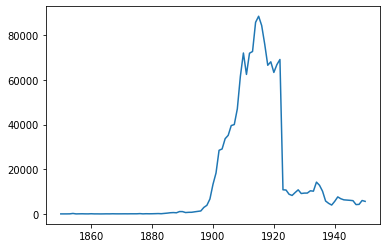

In [7]:
sampler.population['photos_count'].plot()

## Creating a sample for the period 1900-1920

In [8]:
sample = sampler.create_sample(1000, step=5, start_year=1900, end_year=1920, year_sample=False)

  0%|          | 0/5 [00:00<?, ?it/s]

If we look at our `sample` you'll see we get back a pandas `DataFrame`. 

In [9]:
sample

,filepath,pub_date,page_seq_num,edition_seq_num,batch,lccn,box,score,ocr,place_of_publication,geographic_coverage,name,publisher,url,page_url
0,nn_leibniz_ver01/data/sn83030193/100481534/190...,1900-10-12,349,1,nn_leibniz_ver01,sn83030193,"[0.13356623901210082, 0.045045071203731794, 0....",0.985234,"[BABY, IS, A, HOPELESS, w, MONTBE, LEDDKMMOH, ...","New York, N.Y.",[New York--New York--New York],The evening world. [volume],[publisher not identified],https://news-navigator.labs.loc.gov/data/nn_le...,https://chroniclingamerica.loc.gov/data/batche...
1,dlc_greece_ver01/data/sn83030214/00175040900/1...,1900-08-26,455,1,dlc_greece_ver01,sn83030214,"[0.49960417907034155, 0.174825865470323, 0.662...",0.983903,"[afISS, ESTEL.L.E, REEL., National, Superinten...",New York [N.Y.],[New York--New York--New York],New-York tribune. [volume],New York Tribune,https://news-navigator.labs.loc.gov/data/dlc_g...,https://chroniclingamerica.loc.gov/data/batche...
2,dlc_kenya_ver01/data/sn83030214/00175040912/19...,1900-09-06,109,1,dlc_kenya_ver01,sn83030214,"[0.3733236564112506, 0.04188654854793677, 0.45...",0.944494,[&.WAD0H&.],New York [N.Y.],[New York--New York--New York],New-York tribune. [volume],New York Tribune,https://news-navigator.labs.loc.gov/data/dlc_k...,https://chroniclingamerica.loc.gov/data/batche...
3,uuml_nine_ver01/data/sn83045555/00175049630/19...,1900-12-29,1137,1,uuml_nine_ver01,sn83045555,"[0.1404218091762823, 0.20635465631313293, 0.40...",0.973591,"[c, tf, l, I, I, =, 4, 1, i, 1, f, lH, +, +, H...",Great Salt Lake City [Utah],[Utah--Salt Lake--Salt Lake City],Deseret evening news. [volume],G.Q. Cannon,https://news-navigator.labs.loc.gov/data/uuml_...,https://chroniclingamerica.loc.gov/data/batche...
4,mohi_gaines_ver01/data/sn84020274/00211109014/...,1900-02-11,199,1,mohi_gaines_ver01,sn84020274,"[0.425581067157793, 0.5476240492226792, 0.5518...",0.905333,"[.iiii, .1, si, mi-ti;i:, Wlio, u;iiin, I.-, k...","St. Louis, Mo.",[Missouri--Saint Louis--Saint Louis],The St. Louis Republic. [volume],G. Knapp & Co.,https://news-navigator.labs.loc.gov/data/mohi_...,https://chroniclingamerica.loc.gov/data/batche...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,nmu_dogbane_ver01/data/sn94056836/00280773694/...,1920-06-30,1209,1,nmu_dogbane_ver01,sn94056836,"[0.5298427108890754, 0.23251891748865222, 0.68...",0.922056,"[j, Cat, l, Fa4a, Tkat, WB1, NX, A44, Ffeak]","Columbus, N.M.",[New Mexico--Luna--Columbus],Columbus daily courier. [volume],Kilgore & Burkhead,https://news-navigator.labs.loc.gov/data/nmu_d...,https://chroniclingamerica.loc.gov/data/batche...
1186,ct_doors_ver01/data/sn82014519/00414219056/192...,1920-12-23,645,1,ct_doors_ver01,sn82014519,"[0.023379013092225228, 0.027349480093782963, 0...",0.995490,"[SCENE, OF, FIRES, IN, SINN, FEIN, CITY, ., .,...","New Britain, Conn.",[Connecticut--Hartford--New Britain],New Britain herald. [volume],Herald Pub. Co.,https://news-navigator.labs.loc.gov/data/ct_do...,https://chroniclingamerica.loc.gov/data/batche...
1187,pst_holuba_ver02/data/sn83045211/00237280234/1...,1920-08-05,69,1,pst_holuba_ver02,sn83045211,"[0.40011799454292984, 0.7611438605012794, 0.51...",0.932210,"[hove, MHS., WALTKIt, II., WOLF, Mis., Wolf's,...",Philadelphia [Pa.],[Pennsylvania--Philadelphia--Philadelphia],Evening public ledger. [volume],Public Ledger Co.,https://news-navigator.labs.loc.gov/data/pst_h...,https://chroniclingamerica.loc.gov/data/batche...
1188,uuml_basso_ver01/data/sn85058246/00206535337/1...,1920-09-14,838,1,uuml_basso_ver01,sn85058246,"[0.6260984191039697, 0.11290341112987105, 0.77...",0.971296,"[BUT, THE, WOMEN, ARE, I, ALL, FOR, HIM, ., lw...","Logan, Utah",[Utah--Cache--Logan],The Logan Republican. [volume],N.R. Moore,https://news-navigator.labs.loc.gov/data/uuml_...,https://chroniclingamerica.loc.gov/data/batche...


- Metadata 
- Choosing our sample based on what we want to do 
- how large does our sample need to be?

## Downloading the images 

- iiif 
- open data 

In [11]:
sampler.download_sample('sample',pct=50)

  0%|          | 0/1190 [00:00<?, ?it/s]

Exploring our images

In [4]:
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, Image
from IPython.display import Image, display

In [13]:
fdir = 'sample/'
@interact
def show_images(file=os.listdir(fdir)):
    display(Image(fdir+file,width=400,height=400))

interactive(children=(Dropdown(description='file', options=('nmu_beaver_ver01_data_sn93061777_00280774352_1920…

In [14]:
def setup_annotations(images, labels, num_annotations):
    from pigeonXT import annotate
    from IPython.display import display, Image
    return annotate(
      images[:num_annotations],
      options=labels,
      display_fn=lambda filename: display(Image(str(filename),width=224,height=224))
    )

In [15]:
from fastai.vision.utils import  get_image_files

In [16]:
images = get_image_files('sample')

In [17]:
image_annotations = setup_annotations(list(images),['human','no-human'], 200)

HTML(value='0 of 200 Examples annotated, Current Position: 0 ')

Output()

non photos..

In [37]:
image_annotations

,example,changed,label
0,sample/nbu_emerson_ver01_data_sn99021999_0020653946A_1900020401_0632_002_0_96.jpg,True,human
1,sample/idhi_baldacci_ver02_data_sn86091111_00415666007_1915062501_0155_004_0_92.jpg,True,human
2,sample/nmu_coyote_ver02_data_sn93061743_00296025008_1905012801_0034_003_0_96.jpg,True,human
3,sample/dlc_greece_ver01_data_sn83030214_00175040894_1900071501_0306_000_0_99.jpg,True,human
4,sample/dlc_hawaiian_ver01_data_sn83045433_00237288518_1915060801_0394_012_0_93.jpg,True,no-human
...,...,...,...
95,sample/dlc_lima_ver01_data_sn83045433_100493421_1910123001_0887_009_0_95.jpg,True,human
96,sample/iune_guttenberg_ver01_data_sn92053934_00202198636_1905072901_0557_011_0_95.jpg,True,human
97,sample/dlc_martian_ver02_data_sn83045462_00280656525_1910082701_0264_015_0_98.jpg,True,human
98,sample/txdn_canada_ver02_data_sn88084272_00294553599_1910052401_0151_004_0_97.jpg,True,no-human


In [40]:
image_annotations['label'].value_counts(normalize=True)

human       0.82
no-human    0.18
Name: label, dtype: float64

In [42]:
annotated = image_annotations[image_annotations['changed']==True]

In [43]:
annotated

,example,changed,label
0,sample/nbu_emerson_ver01_data_sn99021999_0020653946A_1900020401_0632_002_0_96.jpg,True,human
1,sample/idhi_baldacci_ver02_data_sn86091111_00415666007_1915062501_0155_004_0_92.jpg,True,human
2,sample/nmu_coyote_ver02_data_sn93061743_00296025008_1905012801_0034_003_0_96.jpg,True,human
3,sample/dlc_greece_ver01_data_sn83030214_00175040894_1900071501_0306_000_0_99.jpg,True,human
4,sample/dlc_hawaiian_ver01_data_sn83045433_00237288518_1915060801_0394_012_0_93.jpg,True,no-human
...,...,...,...
95,sample/dlc_lima_ver01_data_sn83045433_100493421_1910123001_0887_009_0_95.jpg,True,human
96,sample/iune_guttenberg_ver01_data_sn92053934_00202198636_1905072901_0557_011_0_95.jpg,True,human
97,sample/dlc_martian_ver02_data_sn83045462_00280656525_1910082701_0264_015_0_98.jpg,True,human
98,sample/txdn_canada_ver02_data_sn88084272_00294553599_1910052401_0151_004_0_97.jpg,True,no-human


In [5]:
from fastai.vision.all import *

In [45]:
dls = ImageDataLoaders.from_df(annotated, fn_col='example', 
                               label_col='label',
                               valid_pct=0.2, 
                               item_tfms=Resize(256),
                               bs=32)

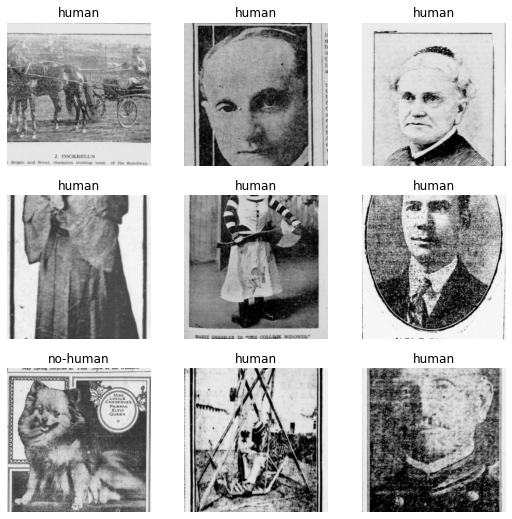

In [46]:
dls.show_batch()

In [49]:
learn = cnn_learner(dls, resnet18, metrics=[F1Score(average='macro'),accuracy])

In [50]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,f1_score,accuracy,time
0,1.304755,2.150578,0.292929,0.300000,00:05


epoch,train_loss,valid_loss,f1_score,accuracy,time
0,0.844614,1.926003,0.248120,0.250000,00:05
1,1.008817,1.731988,0.348371,0.350000,00:06
2,0.973419,1.844732,0.300000,0.300000,00:06
3,0.835582,1.979451,0.248120,0.250000,00:08
4,0.742489,2.001754,0.200000,0.200000,00:08
5,0.692460,1.995634,0.147870,0.150000,00:08
6,0.639884,1.978168,0.248120,0.250000,00:07
7,0.596850,1.840568,0.348371,0.350000,00:08
8,0.547665,1.695981,0.393939,0.400000,00:06
9,0.516531,1.490700,0.393939,0.400000,00:05


In [51]:
from fastai.interpret import ClassificationInterpretation

In [54]:
interp = ClassificationInterpretation.from_learner(learn)

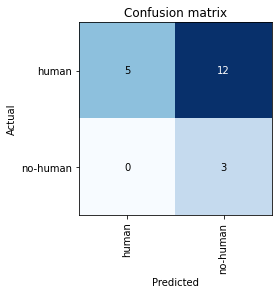

In [55]:
interp.plot_confusion_matrix()

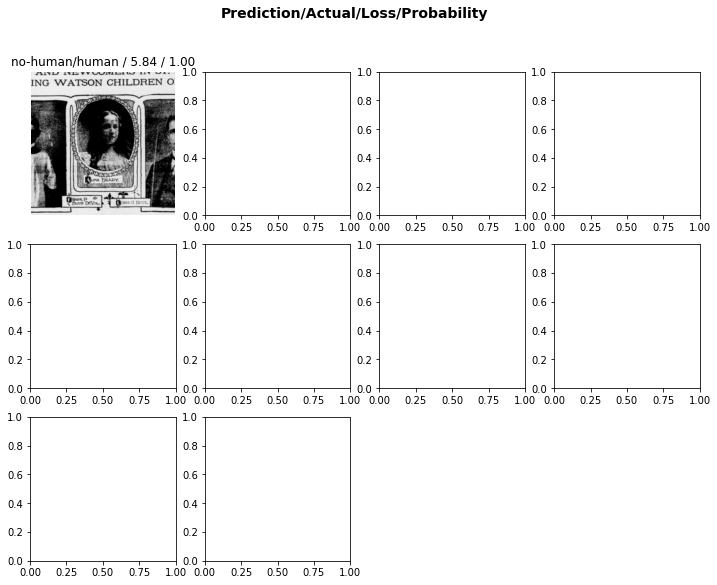

In [56]:
interp.plot_top_losses(k=10)

## Exercise 

- try annotating using other labels 
- you can also explore different sampling approaches (making samples too big might mean you wait a long time for loading the data)

# Adapting existing data

In [6]:
!wget -O images.zip https://zenodo.org/record/4487141/files/images.zip?download=1

--2022-03-16 12:47:04--  https://zenodo.org/record/4487141/files/images.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 880141662 (839M) [application/octet-stream]
Saving to: ‘images.zip’

images.zip          100%[===================>] 839.37M  18.3MB/s    in 96s     

2022-03-16 12:48:41 (8.73 MB/s) - ‘images.zip’ saved [880141662/880141662]



In [7]:
!mkdir images
!unzip images.zip -d images/

Archive:  images.zip
  inflating: images/curiv_llano_ver01_data_sn85066387_00175047955_1908111601_0374_006_0_98.jpg  
  inflating: images/mthi_harrier_ver01_data_sn84036207_00295860194_1910100701_0821_001_0_93.jpg  
  inflating: images/in_chucktaylor_ver02_data_sn86058242_00271745941_1912102601_0542_007_0_97.jpg  
  inflating: images/uuml_layden_ver01_data_sn85058245_206535490_1907022101_0652_000_0_98.jpg  
  inflating: images/deu_fairfax_ver01_data_sn85042354_00383343069_1914100601_0621_006_0_99.jpg  
  inflating: images/msar_diamond_ver01_data_sn87065469_00383344062_1915061701_0096_006_0_97.jpg  
  inflating: images/tu_ernie_ver01_data_sn86064259_00296020576_1909091701_1108_004_0_94.jpg  
  inflating: images/dlc_menze_ver01_data_sn83030214_00206531642_1913042701_0662_002_0_91.jpg  
  inflating: images/az_kangaroorat_ver01_data_sn84024827_00211105379_1913061501_0356_006_0_97.jpg  
  inflating: images/dlc_thompson_ver01_data_sn83030214_00206532129_1917031801_0347_000_0_99.jpg  
  infla

In [68]:
df = pd.read_csv('https://zenodo.org/record/4487141/files/multi_label.csv?download=1')

In [69]:
df.head(10)

,download_image_path,label
0,in_hoosier_ver01_data_sn82015679_00202191757_1904012401_0467_008_0_96.jpg,human
1,dlc_rottweiler_ver01_data_sn83045462_00280655533_1903102601_0046_004_0_95.jpg,human
2,curiv_joshuaTree_ver01_data_sn85066387_00175037858_1899062601_0564_009_0_90.jpg,human|landscape
3,curiv_fiddleneck_ver01_data_sn85066408_00271767213_1916051601_0139_006_0_97.jpg,human
4,me_aroostook_ver01_data_sn84022374_00332895473_1900112801_0384_000_0_96.jpg,human
5,curiv_duckweed_ver02_data_sn85066408_00271767079_1910110201_0896_011_0_93.jpg,human
6,ohi_dearfield_ver01_data_sn85067315_00383341085_1905112301_1260_000_0_97.jpg,human|landscape
7,dlc_ghana_ver01_data_sn84026749_00280764462_1918041401_0665_007_0_98.jpg,human
8,iune_article_ver01_data_sn84025828_0020219381A_1920101601_0023_001_0_97.jpg,human
9,txdn_infiniti_ver03_data_sn88083938_00200294269_1896020901_0185_001_0_92.jpg,human


In [70]:
df['label'] = df.label.str.split('|')

In [71]:
import numpy as np

In [72]:
def get_label(labels):
    if labels is not np.nan:
        for label in labels:
            if label == "human":
                return True 
    return False


In [73]:
df['has_human'] = df['label'].apply(get_label)

In [74]:
df['has_human'].value_counts()

True     1598
False     402
Name: has_human, dtype: int64

In [31]:
df.head(2)

,download_image_path,label,has_human
0,in_hoosier_ver01_data_sn82015679_00202191757_1904012401_0467_008_0_96.jpg,[human],True
1,dlc_rottweiler_ver01_data_sn83045462_00280655533_1903102601_0046_004_0_95.jpg,[human],True


In [32]:
dls = ImageDataLoaders.from_df(df, path='images',
                               fname_col='download_image_path',
                               label_col='has_human',
                               item_tfms=Resize(224))

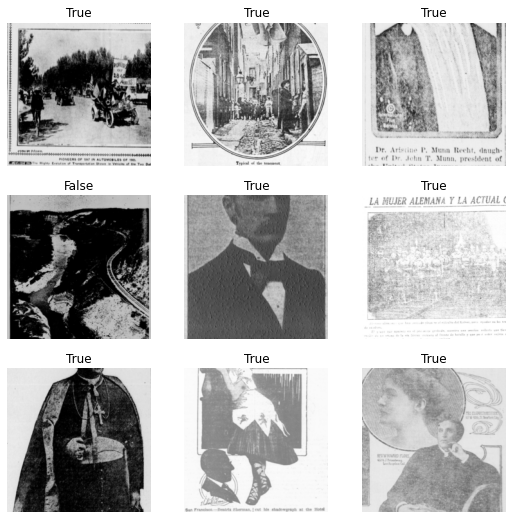

In [34]:
dls.show_batch()

In [75]:
df['has_human'] = df['has_human'].apply(lambda x: 'human' if x is True else '')

In [76]:
df

,download_image_path,label,has_human
0,in_hoosier_ver01_data_sn82015679_00202191757_1904012401_0467_008_0_96.jpg,[human],human
1,dlc_rottweiler_ver01_data_sn83045462_00280655533_1903102601_0046_004_0_95.jpg,[human],human
2,curiv_joshuaTree_ver01_data_sn85066387_00175037858_1899062601_0564_009_0_90.jpg,"[human, landscape]",human
3,curiv_fiddleneck_ver01_data_sn85066408_00271767213_1916051601_0139_006_0_97.jpg,[human],human
4,me_aroostook_ver01_data_sn84022374_00332895473_1900112801_0384_000_0_96.jpg,[human],human
...,...,...,...
1995,khi_corbett_ver01_data_sn82016014_00295870278_1914100801_0408_002_0_98.jpg,[animal],
1996,kyu_casablanca_ver01_data_sn86069457_00206533262_1895061301_0798_004_0_92.jpg,[human],human
1997,idhi_angkor_ver01_data_sn86091084_00279550845_1906033101_0372_000_0_92.jpg,[human],human
1998,txdn_infiniti_ver03_data_sn88083938_00200294269_1897010501_1290_000_0_99.jpg,[human-structure],


In [78]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=RandomSplitter(),
                   get_x=ColReader('download_image_path', pref="images/"),
                   get_y=ColReader('has_human', label_delim=' '),
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms())

In [79]:
dblock.summary(df)

Setting-up type transforms pipelines
0           in_hoosier_ver01_data_sn82015679_00202191757_1904012401_0467_008_0_96.jpg   
1       dlc_rottweiler_ver01_data_sn83045462_00280655533_1903102601_0046_004_0_95.jpg   
2     curiv_joshuaTree_ver01_data_sn85066387_00175037858_1899062601_0564_009_0_90.jpg   
3     curiv_fiddleneck_ver01_data_sn85066408_00271767213_1916051601_0139_006_0_97.jpg   
4         me_aroostook_ver01_data_sn84022374_00332895473_1900112801_0384_000_0_96.jpg   
...                                                                               ...   
1995       khi_corbett_ver01_data_sn82016014_00295870278_1914100801_0408_002_0_98.jpg   
1996    kyu_casablanca_ver01_data_sn86069457_00206533262_1895061301_0798_004_0_92.jpg   
1997       idhi_angkor_ver01_data_sn86091084_00279550845_1906033101_0372_000_0_92.jpg   
1998     txdn_infiniti_ver03_data_sn88083938_00200294269_1897010501_1290_000_0_99.jpg   
1999        iune_folio_ver01_data_sn92053934_00212471902_1901123101_0116_

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


  Pipeline: Resize -- {'size': (224, 224), 'method': 'crop', 'pad_mode': 'reflection', 'resamples': (2, 0), 'p': 1.0} -> ToTensor
    starting from
      (PILImage mode=RGB size=679x1050, TensorMultiCategory([1.]))
    applying Resize -- {'size': (224, 224), 'method': 'crop', 'pad_mode': 'reflection', 'resamples': (2, 0), 'p': 1.0} gives
      (PILImage mode=RGB size=224x224, TensorMultiCategory([1.]))
    applying ToTensor gives
      (TensorImage of size 3x224x224, TensorMultiCategory([1.]))

Adding the next 3 samples

No before_batch transform to apply

Collating items in a batch

Applying batch_tfms to the batch built
  Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5} -> Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False}
    starting from
      (TensorImage of size 4x3x224x224, TensorMultiCategory of size 4x1)
    apply

In [80]:
dls = dblock.dataloaders(df, bs=32)

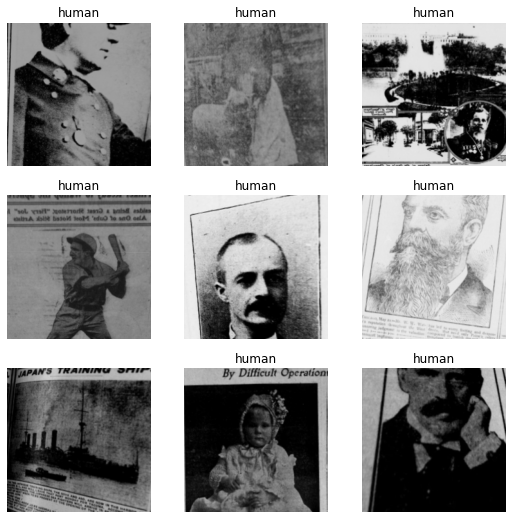

In [81]:
dls.show_batch()

In [85]:
learn = cnn_learner(dls, xresnet50, metrics=[accuracy_multi, RecallMulti(),PrecisionMulti()]).to_fp16()

In [86]:
learn.model

Sequential(
  (0): Sequential(
    (0): ConvLayer(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): ConvLayer(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): ConvLayer(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): ResBlock(
        (convpath): Sequential(
          (0): ConvLayer(
            (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(64, ep

SuggestedLRs(valley=0.0014454397605732083)

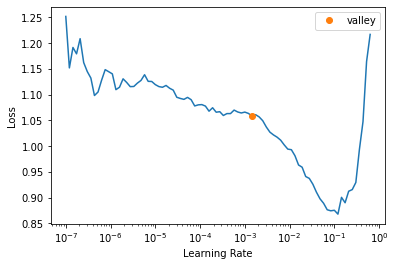

In [87]:
learn.lr_find()

In [89]:
learn.fit_one_cycle(20, lr_max=1e-3,
                    cbs=[EarlyStoppingCallback(monitor='recall_score',  patience=3), 
                                          SaveModelCallback(monitor='recall_score')])

epoch,train_loss,valid_loss,accuracy_multi,recall_score,precision_score,time
0,0.861777,0.703448,0.640000,0.662771,0.598941,01:48
1,0.790956,0.932963,0.642500,0.738783,0.642500,01:43
2,0.706252,0.916243,0.720000,0.759583,0.661708,01:42
3,0.611038,0.406041,0.835000,0.787357,0.733388,01:42
4,0.528458,0.324156,0.882500,0.779167,0.809896,01:42
5,0.470525,0.333405,0.867500,0.764673,0.779855,01:42
6,0.449227,0.363410,0.850000,0.738008,0.748763,01:42


Better model found at epoch 0 with recall_score value: 0.6627707259855055.
Better model found at epoch 1 with recall_score value: 0.738783461103431.
Better model found at epoch 2 with recall_score value: 0.7595827573205982.
Better model found at epoch 3 with recall_score value: 0.7873570441121025.
No improvement since epoch 3: early stopping
